In [ ]:
import findspark
findspark.init()

In [1]:
import pyspark
from pyspark.sql import SparkSession

In [2]:
spark= pyspark.sql.SparkSession.builder.appName("test_import").getOrCreate()

In [3]:
df=spark.sql('''select 'spark' as hello''')
df.show()

+-----+
|hello|
+-----+
|spark|
+-----+



In [4]:
spark

In [5]:
from pyspark.sql.types import StructType,StructField,IntegerType,TimestampType,FloatType,StringType,DoubleType

In [6]:
schema=StructType([
    StructField('VendorID',IntegerType(),True),
    StructField('tpep_pickup_datetime',TimestampType(),True),
    StructField('tpep_dropoff_datetime',TimestampType(),True),
    StructField('passenger_count',IntegerType(),True),
    StructField('trip_distance',FloatType(),True),
    StructField('pickup_longitude',FloatType(),True),
    StructField('pickup_latitude',FloatType(),True),
    StructField('RateCodeID',IntegerType(),True),
    StructField('store_and_fwd_flag',StringType(),True),
    StructField('dropoff_longitude',FloatType(),True),
    StructField('dropoff_latitude',FloatType(),True),
    StructField('payment_type',IntegerType(),True),
    StructField('fare_amount',FloatType(),True),
    StructField('extra',FloatType(),True),
    StructField('mta_tax',FloatType(),True),
    StructField('tip_amount',FloatType(),True),
    StructField('tolls_amount',FloatType(),True),
    StructField('improvement_surcharge',FloatType(),True),
    StructField('total_amount',FloatType(),True)
]
)

In [7]:
df = spark.read.csv('yellow_tripdata.csv',header=True,nullValue='NA',schema=schema)

In [8]:
df.printSchema()

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: float (nullable = true)
 |-- pickup_longitude: float (nullable = true)
 |-- pickup_latitude: float (nullable = true)
 |-- RateCodeID: integer (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- dropoff_longitude: float (nullable = true)
 |-- dropoff_latitude: float (nullable = true)
 |-- payment_type: integer (nullable = true)
 |-- fare_amount: float (nullable = true)
 |-- extra: float (nullable = true)
 |-- mta_tax: float (nullable = true)
 |-- tip_amount: float (nullable = true)
 |-- tolls_amount: float (nullable = true)
 |-- improvement_surcharge: float (nullable = true)
 |-- total_amount: float (nullable = true)



In [9]:
df.show(5,False)

+--------+--------------------+---------------------+---------------+-------------+----------------+---------------+----------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|pickup_longitude|pickup_latitude|RateCodeID|store_and_fwd_flag|dropoff_longitude|dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+-------------+----------------+---------------+----------+------------------+-----------------+----------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|2       |2015-01-15 19:05:39 |2015-01-15 19:23:42  |1              |1.59         |-73.9939        |40.75011       |1         |N                 |-73.974785    

In [10]:
newdf=df.repartition(5)

In [11]:
print(newdf.rdd.getNumPartitions())

5


In [12]:
type(newdf)

pyspark.sql.dataframe.DataFrame

In [13]:
df.write.option("header",True).csv("converteddataframe")

In [14]:
import pandas as  pd
import numpy as  np

In [15]:
data=pd.DataFrame()

In [35]:
def cleandata(df):
    df.dropna(how='any',axis='rows')
   
    return df

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [55]:
maxacc=0
finalmodel=RandomForestRegressor(max_depth=3)
model=RandomForestRegressor(max_depth=3)
finaldata=pd.DataFrame()

for i in range(11):
    zero=str(0) if i<10 else ""
    filename="C:\\Users\\User\\Documents\\converteddataframe\\part-000"+ zero+str(i) + "-65ce44da-fff6-4f06-a8a0-66ad4da7bc9a-c000.csv"
    data=pd.read_csv(filename)
    data.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','VendorID','RateCodeID','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'],axis=1,inplace=True)
    data=cleandata(data)
    
    X=data.iloc[:,[0,1,2,3,4,5]]
    y=data["total_amount"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
    
    model.fit(X_train, y_train)
    #y_pred=model.predict(X_test)
    curracc=model.score(X_test,y_test)
    print("Accuracy of model ",i+1," = ",curracc*100,'%')
    if(curracc>maxacc):
        maxacc=curracc
        finalmodel=model
        finaldata=data


Accuracy of model  1  =  80.49837935231369 %
Accuracy of model  2  =  78.9132001696577 %
Accuracy of model  3  =  76.35880623430835 %
Accuracy of model  4  =  69.96461437042298 %
Accuracy of model  5  =  65.82842649391729 %
Accuracy of model  6  =  79.38464128111612 %
Accuracy of model  7  =  80.50581417964457 %
Accuracy of model  8  =  80.7480336771226 %
Accuracy of model  9  =  78.4926470202491 %
Accuracy of model  10  =  79.92868627345419 %
Accuracy of model  11  =  80.30892924300095 %


In [56]:
print("Accuracy of model selected = ",maxacc*100,"%")

Accuracy of model selected =  80.7480336771226 %


In [57]:
for i in range(10,15):
    
    filename="C:\\Users\\User\\Documents\\converteddataframe\\part-000" + str(i) + "-65ce44da-fff6-4f06-a8a0-66ad4da7bc9a-c000.csv"
    data=pd.read_csv(filename)
    data.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime','VendorID','RateCodeID','store_and_fwd_flag','payment_type','fare_amount','extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge'],axis=1,inplace=True)
    print("Validation file ",i-9," = ",finalmodel.score(data.iloc[:,:-1],data["total_amount"])*100,"%")

Validation file  1  =  78.4583268850674 %
Validation file  2  =  78.23763685149262 %
Validation file  3  =  0.001035452719577723 %
Validation file  4  =  79.305260423657 %
Validation file  5  =  67.8084434837801 %


array([[<AxesSubplot:title={'center':'passenger_count'}>]], dtype=object)

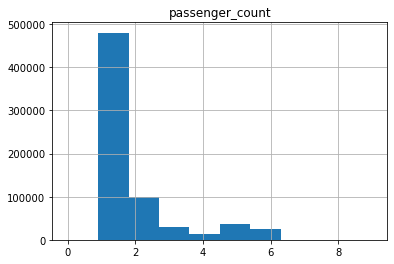

In [58]:
data.hist(column="passenger_count")

In [42]:
import matplotlib.pyplot as  plt

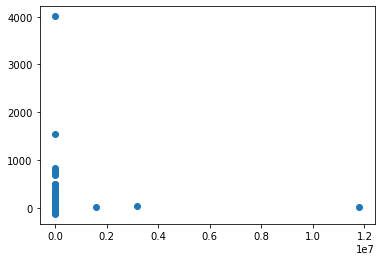

In [59]:
plt.scatter(data['trip_distance'],data['total_amount'])

In [60]:
data['trip_distance'].describe()

count    6.863750e+05
mean     2.699893e+01
std      1.487855e+04
min      0.000000e+00
25%      1.000000e+00
50%      1.700000e+00
75%      3.100000e+00
max      1.180000e+07
Name: trip_distance, dtype: float64

(array([1.28890e+04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 3.00000e+00,
        6.73481e+05, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([ 0.     ,  7.08255, 14.1651 , 21.24765, 28.3302 , 35.41275,
        42.4953 , 49.57785, 56.6604 , 63.74295, 70.8255 ]),
 <BarContainer object of 10 artists>)

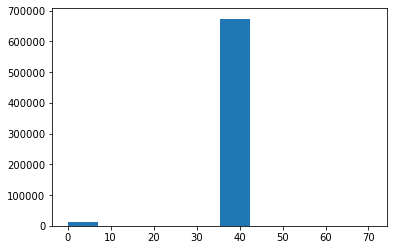

In [61]:
plt.hist(data['dropoff_latitude'])

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 5.00000e+00,
        6.73481e+05, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.28880e+04]),
 array([-152.03401 , -136.830609, -121.627208, -106.423807,  -91.220406,
         -76.017005,  -60.813604,  -45.610203,  -30.406802,  -15.203401,
           0.      ]),
 <BarContainer object of 10 artists>)

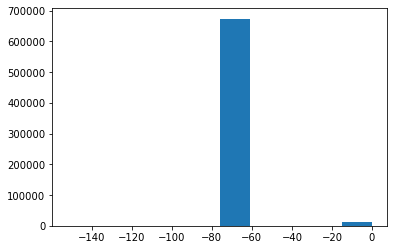

In [62]:
plt.hist(data['dropoff_longitude'])